In [2]:
# EDA e Visualização
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

c:\Users\Luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carregar Dados

In [3]:
df_laptops = pd.read_csv('datasets\laptops.csv')

In [4]:
df_laptops.head()

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1


In [5]:
# Estatísticas 
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [6]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [7]:
# Checar variavel year_of_warranty
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [8]:
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptops.year_of_warranty = df_laptops['year_of_warranty'].astype(int)

In [9]:
# Transformar variável booleana em int (is_touch_screen)
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int)

In [10]:
# Distribuição da variavel brand
percentual_brand = df_laptops.value_counts('brand') / len(df_laptops) * 100
px.bar(percentual_brand, title='Distribuição de marcas de laptops', color=percentual_brand.index, labels={'value': 'Percentual (%)', 'brand': 'Marca'})

In [11]:
# Distribuição da variavel processor_brand
percentual_processor_brand = df_laptops.value_counts('processor_brand') / len(df_laptops) * 100
px.bar(percentual_processor_brand, title='Distribuição de marcas de processadores', color=percentual_processor_brand.index, labels={'value': 'Percentual (%)', 'processor_brand': 'Marca'})

<Axes: xlabel='price', ylabel='Count'>

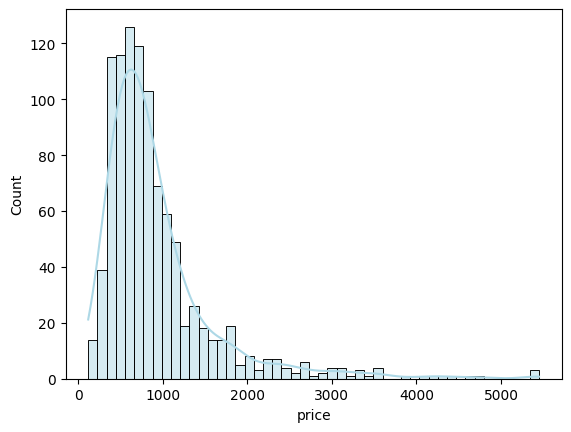

In [12]:
# Distribuição da variavel price
sns.histplot(df_laptops['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

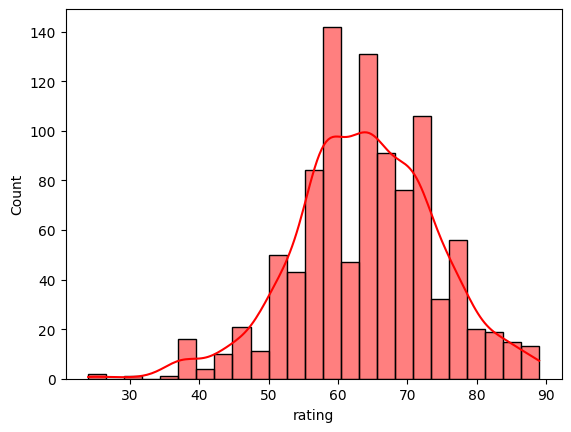

In [13]:
# Distribuição da variavel rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

In [14]:
# Plot de Distribuição (BoxPlot) de brand e price
px.box(df_laptops, x='price', y='brand', color='brand', orientation='h')

In [15]:
# Plot de Distribuição (BoxPlot) de rating e brand
px.box(df_laptops, x='rating', y='brand', color='brand', orientation='h')

In [16]:
# Scatter Plot de price e rating
px.scatter(df_laptops, x='price', y='rating', color='brand')

## Treinar modelos de clustering hierarquico

In [17]:
# Selecionar as colunas
X = df_laptops.copy()

# Remover colunas descenessárias
X.drop(columns=['index', 'model'], axis= 1, inplace=True)

In [18]:
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity', 'display_size', 'resolution_width', 'resolution_height']

categorical_features = ['brand', 'processor_brand', 'gpu_brand', 'gpu_type', 'os']

In [19]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [20]:
# Criar preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])




In [21]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [25]:
def hierarquical_aglomerative_objective(trial):
    # Definir os Hiperparâmetros
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    # Linkage = Critério de distanciamento entre os clusters
    # Ward = Variância
    # Complete = Distância máxima
    # Average = Média
    # Single = Distância mínima
    linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

    # Instanciar o modelo
    hierarquical_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

    # Treinar o modelo e ja executar a clusterização
    y = hierarquical_model.fit_predict(X_transformed.toarray())

    # Calcular o silhouette_score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [26]:
# Criar o objeto de estudo
search_space_ag = {'n_clusters': range(10, 151), 'linkage': ['ward', 'complete', 'average', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(sampler=sampler_ag, direction='maximize')

[I 2024-07-25 10:31:17,165] A new study created in memory with name: no-name-502f6a9a-ecc8-4c18-90f2-7d6eb6ffe285


In [27]:
# Executar o estudo
estudo_ag.optimize(hierarquical_aglomerative_objective, n_trials=600)

[I 2024-07-25 10:31:20,618] Trial 0 finished with value: 0.13826163193289398 and parameters: {'n_clusters': 23, 'linkage': 'complete'}. Best is trial 0 with value: 0.13826163193289398.
[I 2024-07-25 10:31:20,700] Trial 1 finished with value: 0.2503636469950694 and parameters: {'n_clusters': 89, 'linkage': 'ward'}. Best is trial 1 with value: 0.2503636469950694.
[I 2024-07-25 10:31:20,784] Trial 2 finished with value: 0.22484977768132305 and parameters: {'n_clusters': 111, 'linkage': 'average'}. Best is trial 1 with value: 0.2503636469950694.
[I 2024-07-25 10:31:20,850] Trial 3 finished with value: -0.0241670363509758 and parameters: {'n_clusters': 42, 'linkage': 'single'}. Best is trial 1 with value: 0.2503636469950694.
[I 2024-07-25 10:31:20,932] Trial 4 finished with value: 0.2212420302678087 and parameters: {'n_clusters': 42, 'linkage': 'ward'}. Best is trial 1 with value: 0.2503636469950694.
[I 2024-07-25 10:31:21,000] Trial 5 finished with value: 0.19340598769463999 and parameters

In [30]:
# Mostrar os melhores parâmetros
best_params_ag = estudo_ag.best_params

print(f'Clusters = {best_params_ag["n_clusters"]}, Linkage = {best_params_ag["linkage"]}')

Clusters = 149, Linkage = ward


In [31]:
def hierarquical_divisive_objective(trial):
    # Definir os Hiperparâmetros
    n_clusters = trial.suggest_int('n_clusters', 10, 150)

    # Instanciar o modelo
    hierarquical_model = BisectingKMeans(n_clusters=n_clusters)

    # Treinar o modelo e ja executar a clusterização
    y = hierarquical_model.fit_predict(X_transformed.toarray())

    # Calcular o silhouette_score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [32]:
# Criar o objeto de estudo
search_space_di = {'n_clusters': range(10, 151)}
sampler_di = optuna.samplers.GridSampler(search_space=search_space_di)
estudo_di = optuna.create_study(sampler=sampler_di, direction='maximize')

[I 2024-07-25 10:37:16,499] A new study created in memory with name: no-name-1fcfc946-5866-4131-a998-d3310768be90


In [33]:
# Executar o estudo
estudo_di.optimize(hierarquical_divisive_objective, n_trials=200)

[I 2024-07-25 10:38:14,083] Trial 0 finished with value: 0.13385129597938686 and parameters: {'n_clusters': 43}. Best is trial 0 with value: 0.13385129597938686.
[I 2024-07-25 10:38:14,541] Trial 1 finished with value: 0.14712679312815982 and parameters: {'n_clusters': 29}. Best is trial 1 with value: 0.14712679312815982.
[I 2024-07-25 10:38:14,918] Trial 2 finished with value: 0.14355033196500683 and parameters: {'n_clusters': 39}. Best is trial 1 with value: 0.14712679312815982.
[I 2024-07-25 10:38:15,803] Trial 3 finished with value: 0.1904551747029531 and parameters: {'n_clusters': 118}. Best is trial 3 with value: 0.1904551747029531.
[I 2024-07-25 10:38:16,217] Trial 4 finished with value: 0.15014394299535883 and parameters: {'n_clusters': 63}. Best is trial 3 with value: 0.1904551747029531.
[I 2024-07-25 10:38:17,002] Trial 5 finished with value: 0.2031543584462268 and parameters: {'n_clusters': 142}. Best is trial 5 with value: 0.2031543584462268.
[I 2024-07-25 10:38:17,339] Tri

In [37]:
# Mostrar os melhores parâmetros
best_params_di = estudo_di.best_params

best_params_di

{'n_clusters': 147}

In [38]:
# Criar o modelo com melhores parâmetros

best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'], linkage=best_params_ag['linkage']
)

In [39]:
# Treinar o modelo
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [40]:
# Verificar silhouette_score
best_score = silhouette_score(X_transformed, best_model.labels_)
best_score

np.float64(0.32745480721431686)

In [41]:
# Criar uma coluna com cluster escolhido no dataframe original
df_laptops['cluster'] = best_model.labels_

## Visualizar Resultados

In [42]:
# Mostrar chart com trials do optuna
fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig.show()

In [43]:
# Treinar modelo com scipy
modelo_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

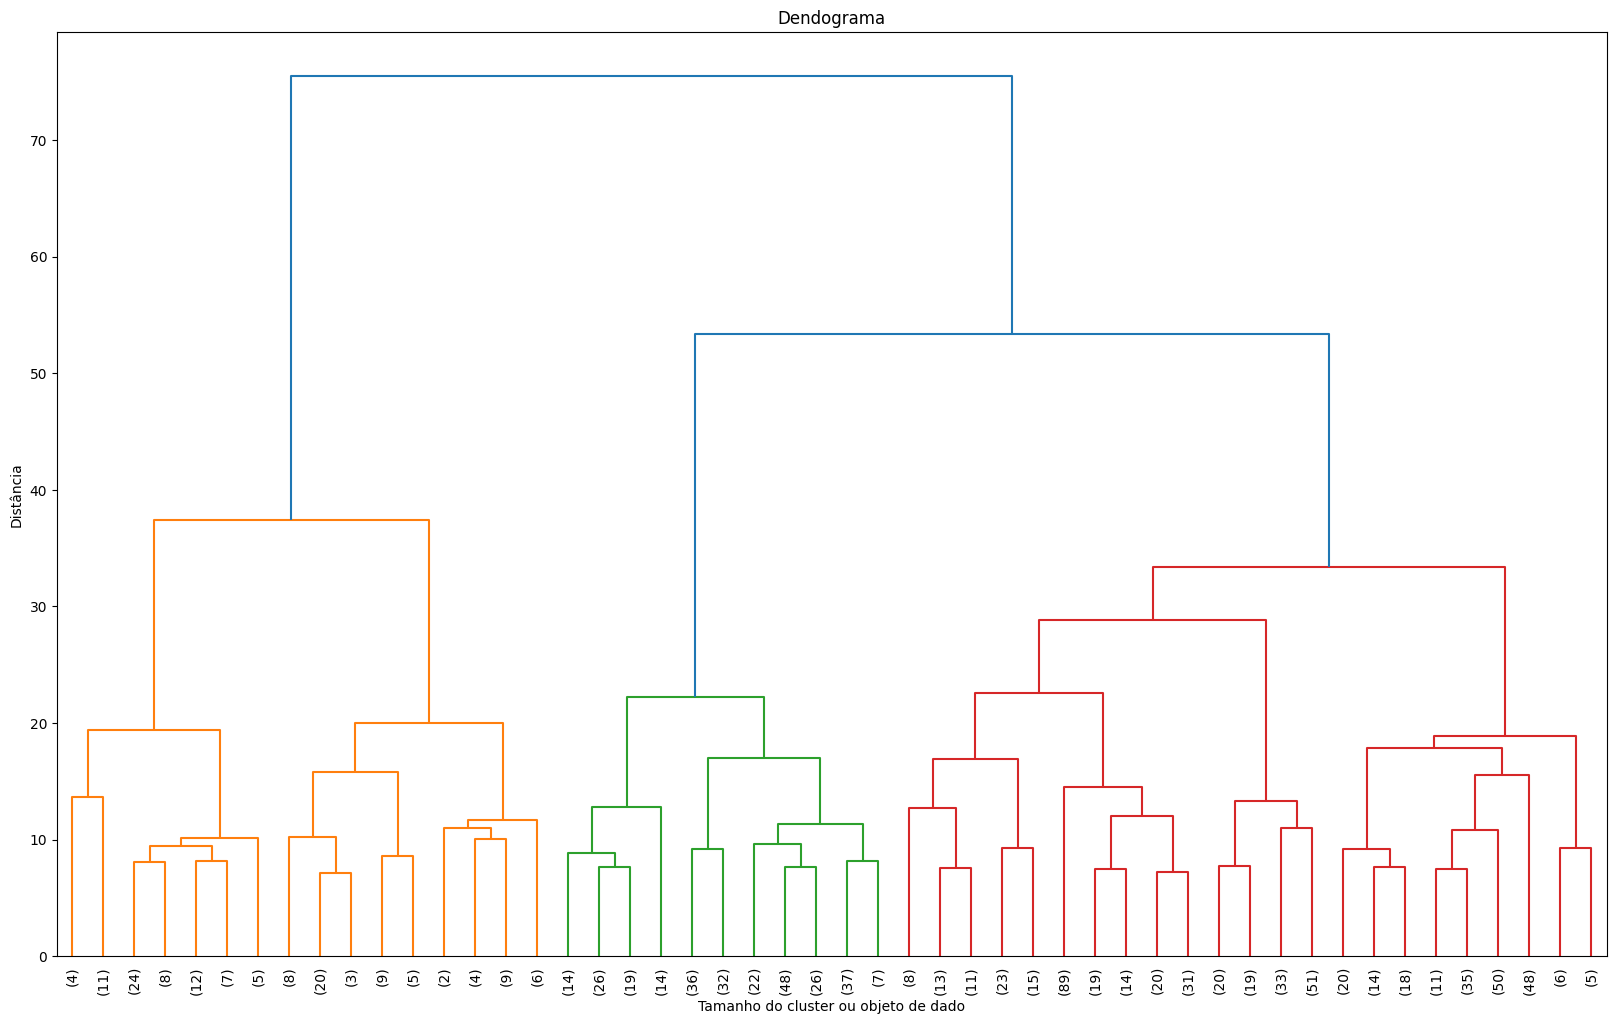

In [46]:
# Mostrar Dendograma 
plt.figure(figsize=(20, 12))
dendrogram(modelo_de, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendograma')
plt.xlabel('Tamanho do cluster ou objeto de dado')
plt.ylabel('Distância')
plt.show() 

In [47]:
# Cortar o dendograma
clusters_de_scipy = cut_tree(modelo_de, height=32)
np.unique(clusters_de_scipy)

array([0, 1, 2, 3, 4])

In [48]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster')

In [49]:
# Cruzamento entre brand e rating, apresentando os clusters
px.scatter(df_laptops, x='brand', y='rating', color='cluster')

In [50]:
# Distribuição da variavel cluster 
percentual_cluster = df_laptops.value_counts('cluster') / len(df_laptops) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

## Salvar o modelo, preprocessor e CSV Atualizado 

In [52]:
# Salvar o modelo e Preprocessor
import joblib

# Salvar o modelo
joblib.dump(best_model, 'modelo_cluster.pkl')

# Salvar o preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [53]:
# Salvar o dataframe
df_laptops.to_csv('datasets\laptops_clustered.csv', index=False)